In [1]:
import xarray as xr
import matplotlib.pyplot as plt

import common

In [2]:
offline = xr.open_dataset("fig_data/offline_zonal_avg.nc")
online = xr.open_dataset("fig_data/online_zonal_avg.nc")

In [3]:
units = {
    "cloud_water_mixing_ratio": "mg/kg",
    "air_temperature": "K",
    "specific_humidity": "g/kg",
    "relative_humidity": "Relative humidity",
}

scale_factors = {
    "cloud_water_mixing_ratio": 1e6,
    "specific_humidity": 1e3,
}

simple_name = {
    "cloud_water_mixing_ratio": "cloud water",
    "air_temperature": "air temperature",
    "specific_humidity": "specific humidity",
    "relative_humidity": "relative humidity",
}

In [4]:
plot_fields = ["cloud_water_mixing_ratio", "relative_humidity", "air_temperature"]

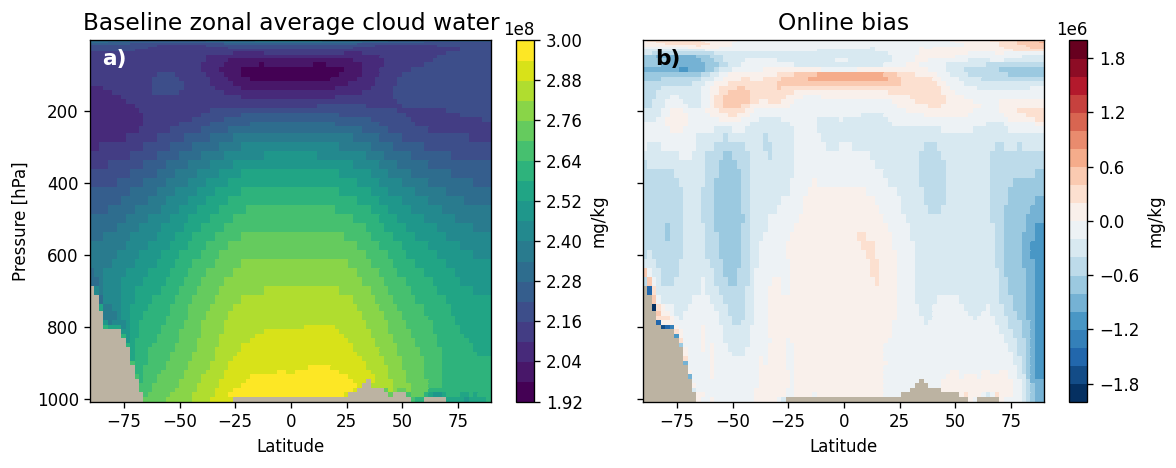

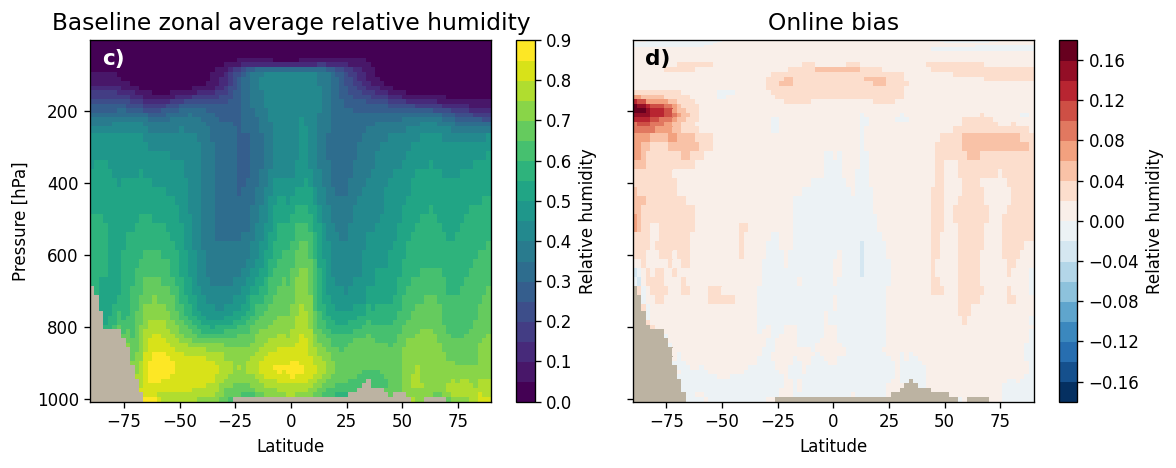

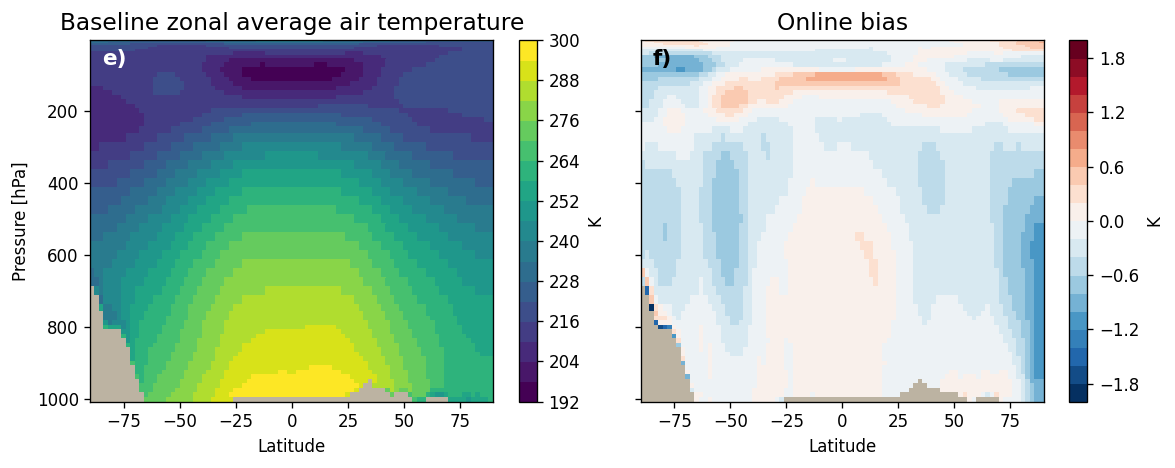

In [5]:

figsize = (10, 4)

fig_labels = [("a)", "b)"), ("c)", "d)"), ("e)", "f)")]

for f, labels  in zip(plot_fields, fig_labels):
    baseline = offline[f].mean(dim="init")
    bias = (online[f] - offline[f]).mean(dim="init")
    scale_factor = scale_factors.get(f, 1)
    unit_label = units[f]
    
    fig, ax = plt.subplots(1, 2, dpi=120, figsize=figsize, sharey=True)
    left, right = labels
    (baseline * scale_factor).mean(dim="time").plot(y="pressure", yincrease=False, cmap=common.Viridis_LAND, ax=ax[0], levels=20, cbar_kwargs=dict(label=unit_label), rasterized=True)
    (bias * scale_factor).mean(dim="time").plot(y="pressure", yincrease=False, cmap=common.RdBu_LAND, ax=ax[1], levels=20, cbar_kwargs=dict(label=unit_label), rasterized=True)
    ax[0].text(0.03, 0.93, left, fontdict=dict(color="white", size=13, weight="bold"), transform=ax[0].transAxes)
    ax[1].text(0.03, 0.93, right, fontdict=dict(color="black", size=13, weight="bold"), transform=ax[1].transAxes)
    ax[0].set_ylabel("Pressure [hPa]")
    ax[1].set_ylabel("")
    ax[0].set_xlabel("Latitude")
    ax[1].set_xlabel("Latitude")
    ax[0].set_title(f"Baseline zonal average {simple_name[f]}", size=14)
    ax[1].set_title("Online bias", size=14)
    plt.tight_layout()
    common.savefig(f"zonal_bias_{f}")
    plt.show()